<a href="https://colab.research.google.com/github/Aye-Nyein-Thaw/TensorFlow-Beginner/blob/main/coding-exercise/week%205/part1/2_EarlyStopping_Callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EarlyStopping Callback

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load diabetes dataset

In [ ]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis = 0)) / targets.std()

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size = 0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Define functions

In [ ]:
# Define helper functions

def evaluate(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy = {acc:0.2f}%, Loss = {loss:0.2f}'.format(acc = test_acc * 100, loss = test_loss))
    
def get_new_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    return model

## Train the model

In [ ]:
## Create new model and train
model = get_new_model()

history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 24ms/step - loss: 0.9225 - mae: 0.8218 - val_loss: 0.9585 - val_mae: 0.8521
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6576 - mae: 0.6772 - val_loss: 0.4769 - val_mae: 0.5762
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5024 - mae: 0.5718 - val_loss: 0.5158 - val_mae: 0.6101
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4743 - mae: 0.5579 - val_loss: 0.4084 - val_mae: 0.5328
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4915 - mae: 0.5533 - val_loss: 0.4323 - val_mae: 0.5541
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4489 - mae: 0.5375 - val_loss: 0.4168 - val_mae: 0.5379
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4620 - mae: 0.5396 - val_loss: 0.4300 - val_mae: 0.5506
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4734 -

Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0772 - mae: 0.2126 - val_loss: 0.6040 - val_mae: 0.6169
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.2126 - val_loss: 0.5511 - val_mae: 0.5902
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.2069 - val_loss: 0.6068 - val_mae: 0.6145
Epoch 66/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0788 - mae: 0.2123 - val_loss: 0.6018 - val_mae: 0.6051
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0696 - mae: 0.2004 - val_loss: 0.5970 - val_mae: 0.6115
Epoch 68/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0702 - mae: 0.2011 - val_loss: 0.6108 - val_mae: 0.6030
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0557 - mae: 0.1762 - val_loss: 0.6560 - val_mae: 0.6352
Epoch 70/100
13/13 [==============================] - 0s 4ms/step - loss: 0.

## Plot the learning curves

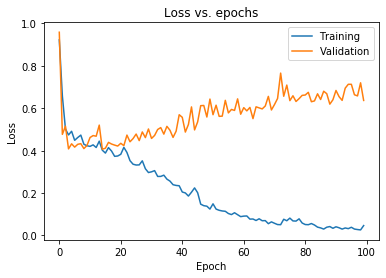

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Early Stopping callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(patience = 2,
                           monitor = 'val_loss')

In [ ]:
## Create new model and train
model = get_new_model()

history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs = 100,
                   callbacks = [es_callback])

Epoch 1/100
13/13 [==============================] - 0s 10ms/step - loss: 0.9202 - mae: 0.8192 - val_loss: 0.9517 - val_mae: 0.8440
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6385 - mae: 0.6640 - val_loss: 0.4627 - val_mae: 0.5577
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5660 - mae: 0.6059 - val_loss: 0.4629 - val_mae: 0.5788
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4864 - mae: 0.5621 - val_loss: 0.4259 - val_mae: 0.5467
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4772 - mae: 0.5474 - val_loss: 0.4334 - val_mae: 0.5526
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4680 - mae: 0.5506 - val_loss: 0.4149 - val_mae: 0.5312
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4607 - mae: 0.5469 - val_loss: 0.4194 - val_mae: 0.5428
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4576 - 